## Business Understanding

This is just a dataset for practicing to classify the sepsis illness only

Dataset Description:

    The provided data is a modified version of a publicly available data source, and is subject to copyright.

Donor of database:

                     - The Johns Hopkins University
                     - Johns Hopkins Road
                     - Laurel, MD 20707
                     - (301) 953-6231

Licence agreement:

    The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.


**Data Dictionary**
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2)
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split 


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import chi2_contingency
#import pingouin as pg

from fastapi import FastAPI


import warnings
warnings.filterwarnings('ignore')


In [36]:
pfiles_df = pd.read_csv('C:/Users/user/Documents/LP5-ML-API/P5-Machine-Learning-API/Data/Paitients_Files_Train.csv')

### Exploratory Data Analysis: EDA

In [3]:
pfiles_df.shape

(599, 11)

In [4]:
pfiles_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
pfiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
pfiles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [7]:
pfiles_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
pfiles_df.duplicated().sum()

np.int64(0)

#### Univariate Analysis

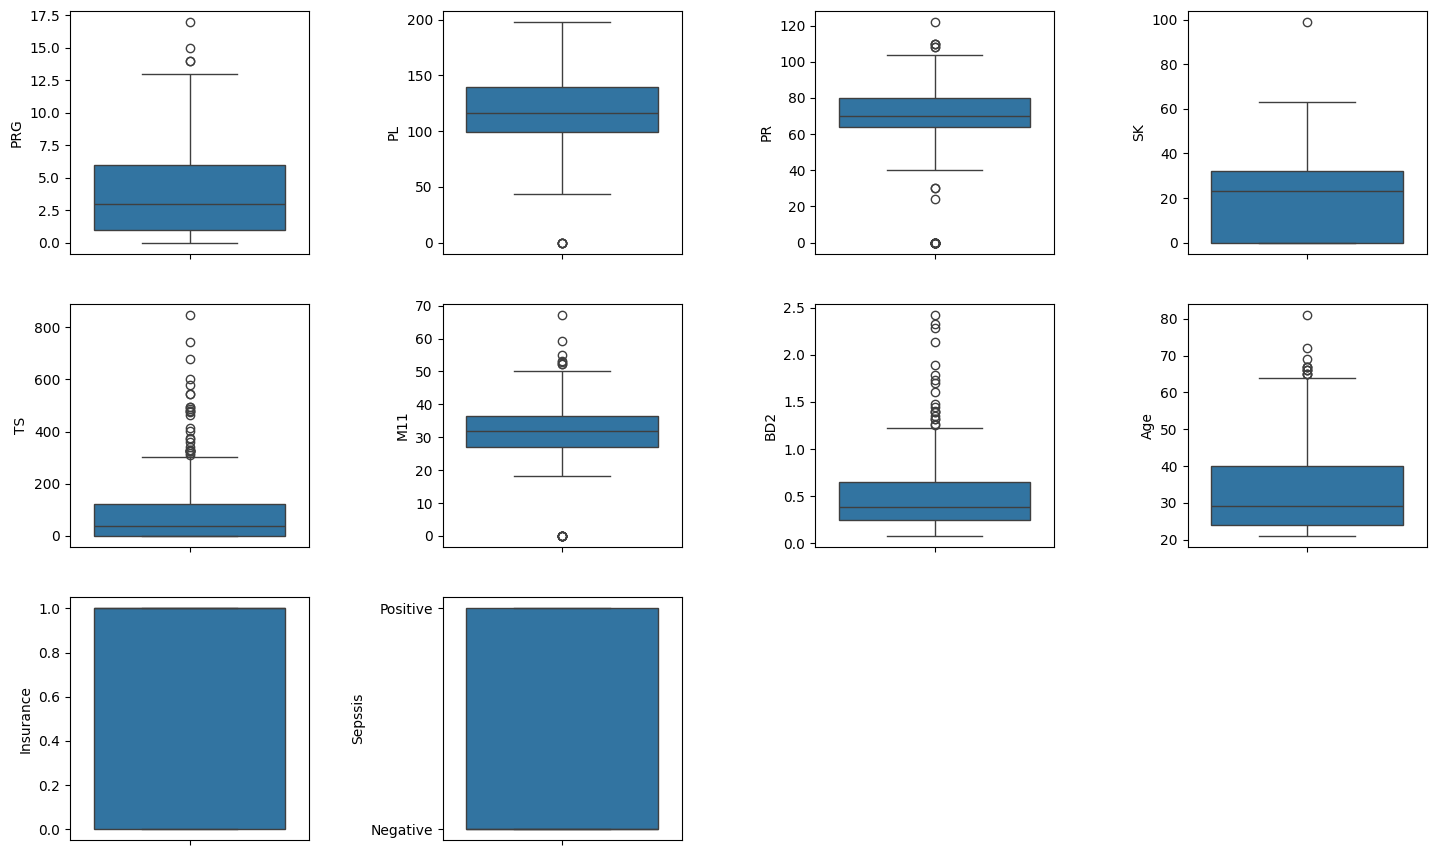

In [9]:
pfiles_df_noid = pfiles_df.drop(['ID'], axis=1)

plt.figure(figsize=(15, 15))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df,y=pfiles_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

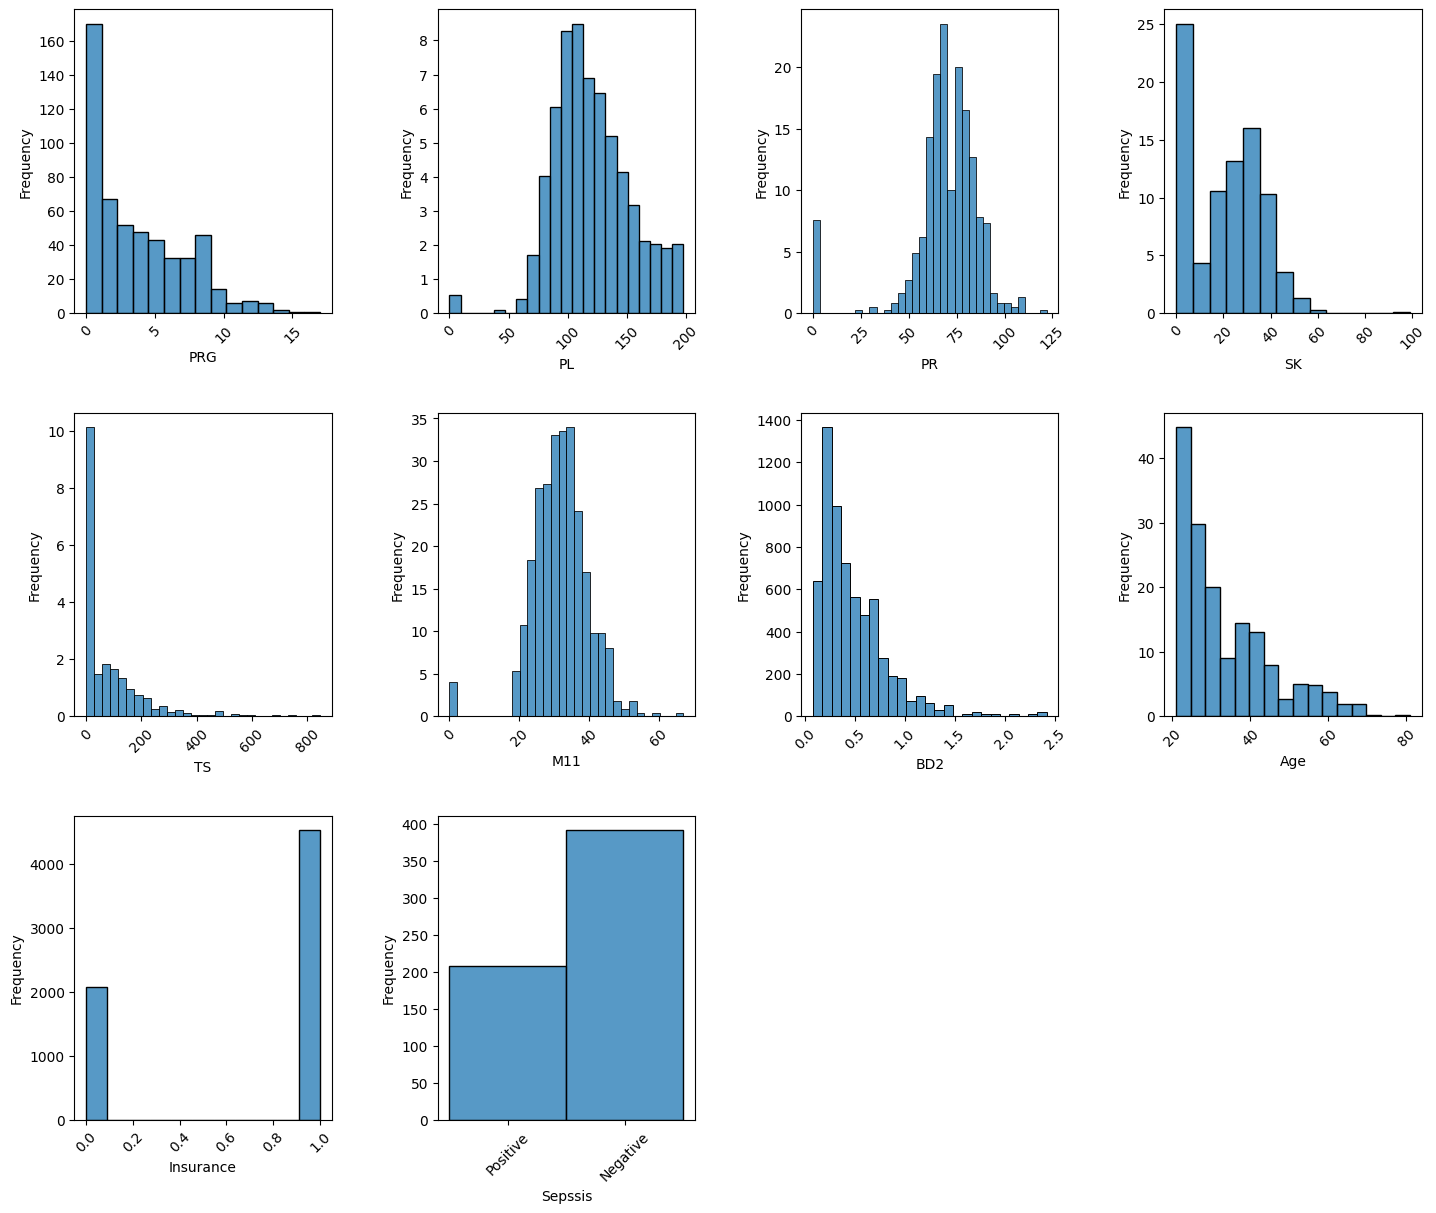

In [10]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

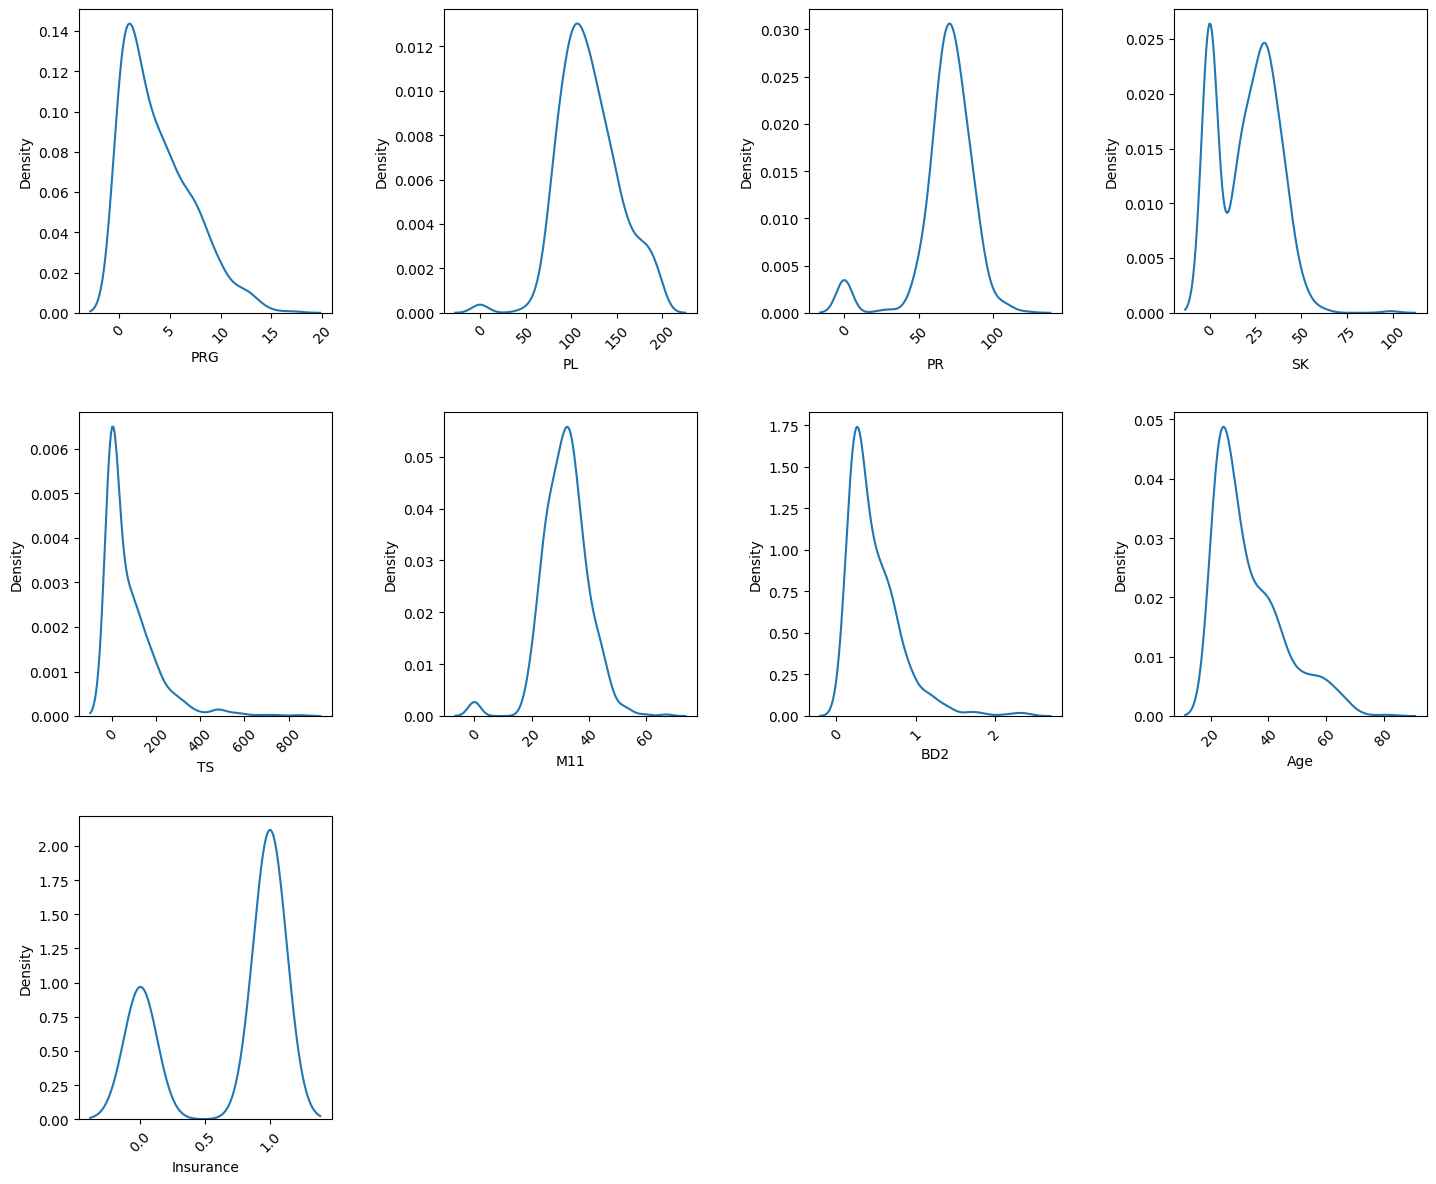

In [11]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid.drop(['Sepssis'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(pfiles_df,x=pfiles_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

#### Bivariate & Multivariate Analysis

<Axes: ylabel='Density'>

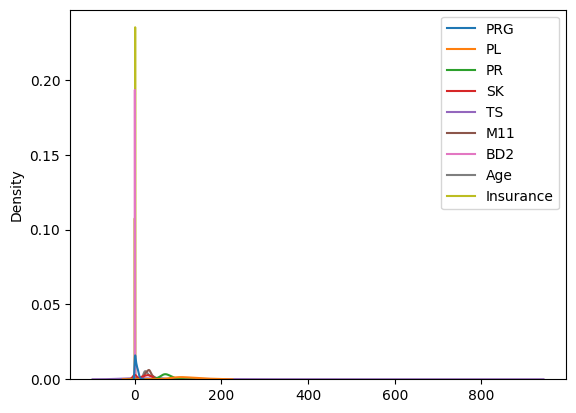

In [12]:
sns.kdeplot(data=pfiles_df_noid)

<Axes: ylabel='Density'>

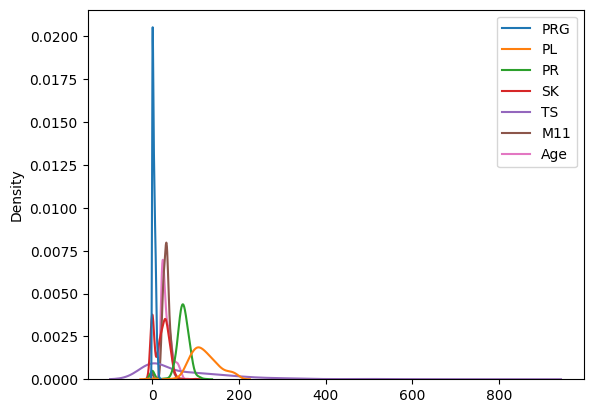

In [13]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2'], axis=1))

<Axes: ylabel='Density'>

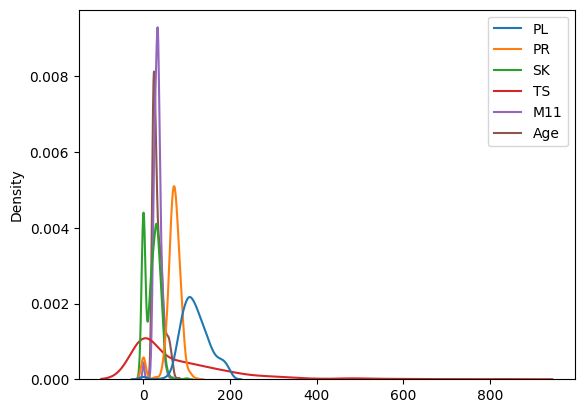

In [14]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG'], axis=1))

<Axes: ylabel='Density'>

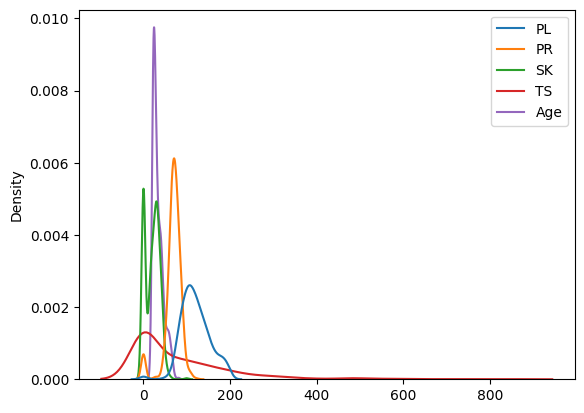

In [15]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG', 'M11'], axis=1))

In [16]:
pfiles_df_noid.drop(['Sepssis'], axis=1).skew()

PRG          0.914008
PL           0.116180
PR          -1.874662
SK           0.164063
TS           2.401585
M11         -0.405255
BD2          1.989472
Age          1.152353
Insurance   -0.804257
dtype: float64

<Axes: >

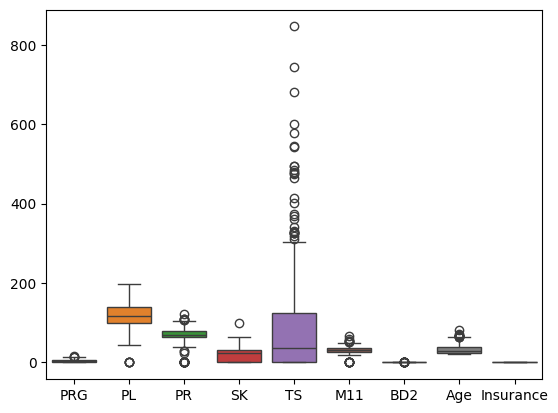

In [17]:
sns.boxplot(data=pfiles_df_noid)

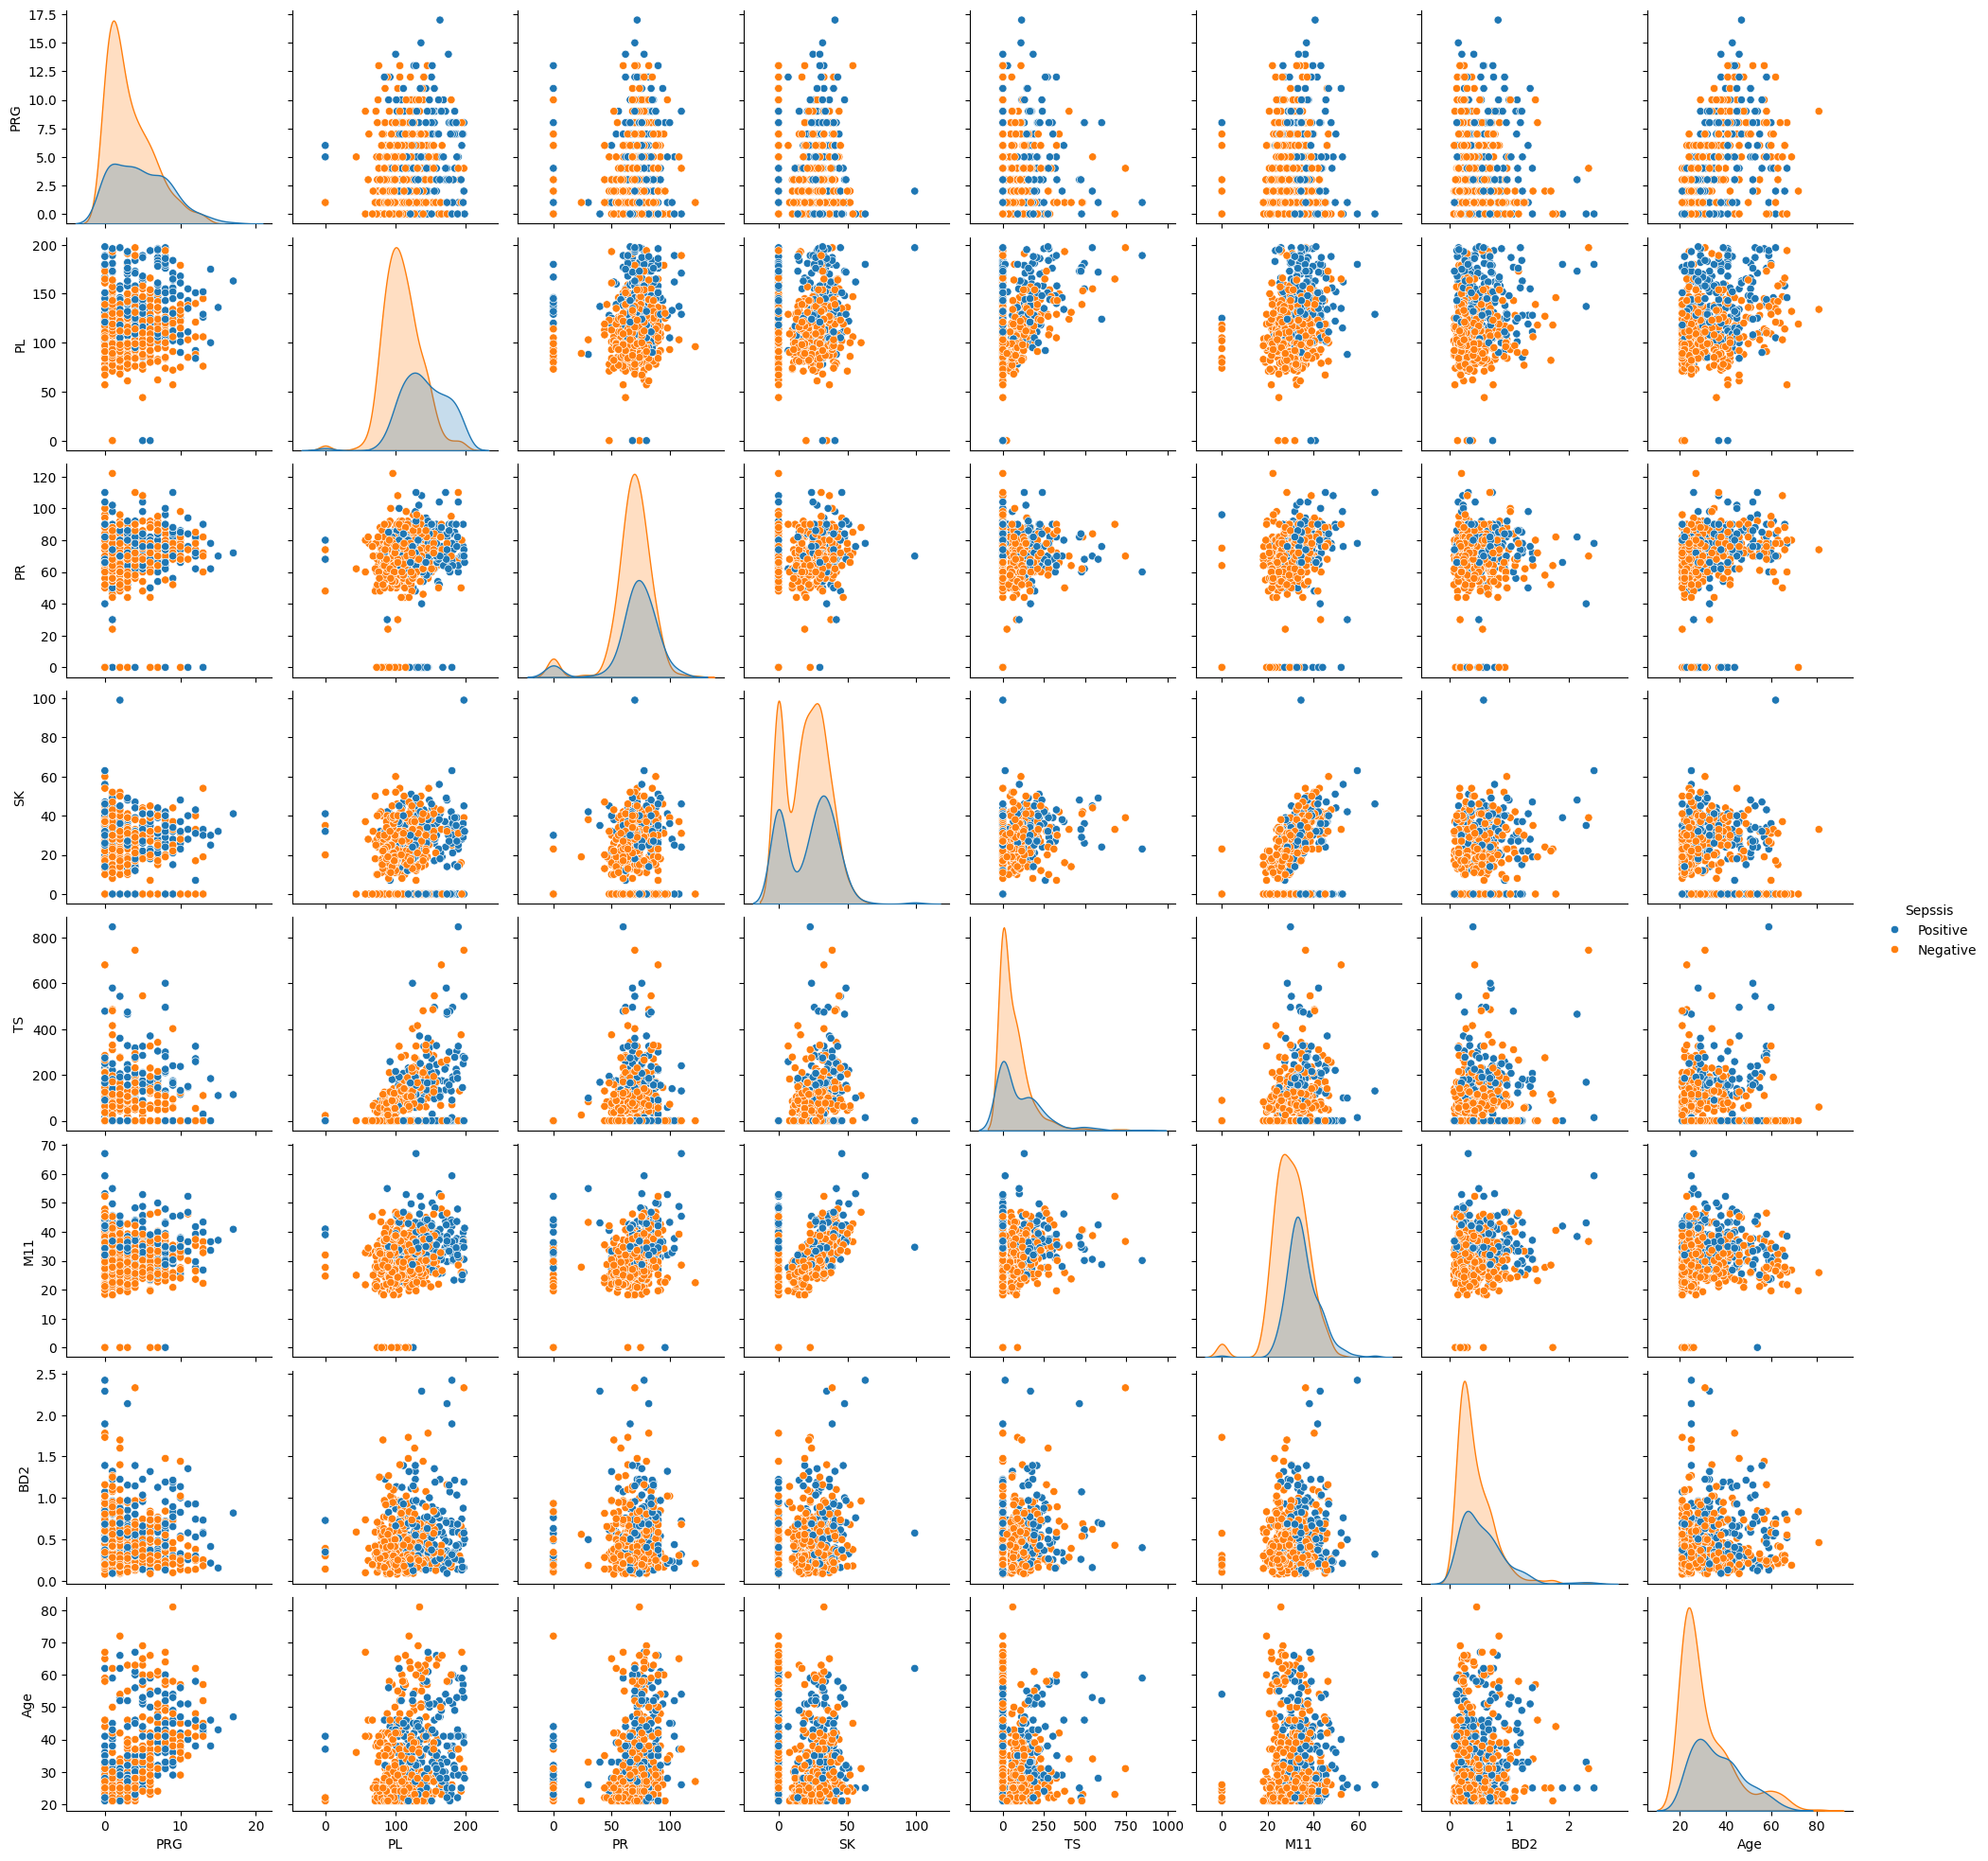

In [18]:
sns.pairplot(data=pfiles_df_noid.drop(['Insurance'], axis=1), hue='Sepssis')

<Axes: >

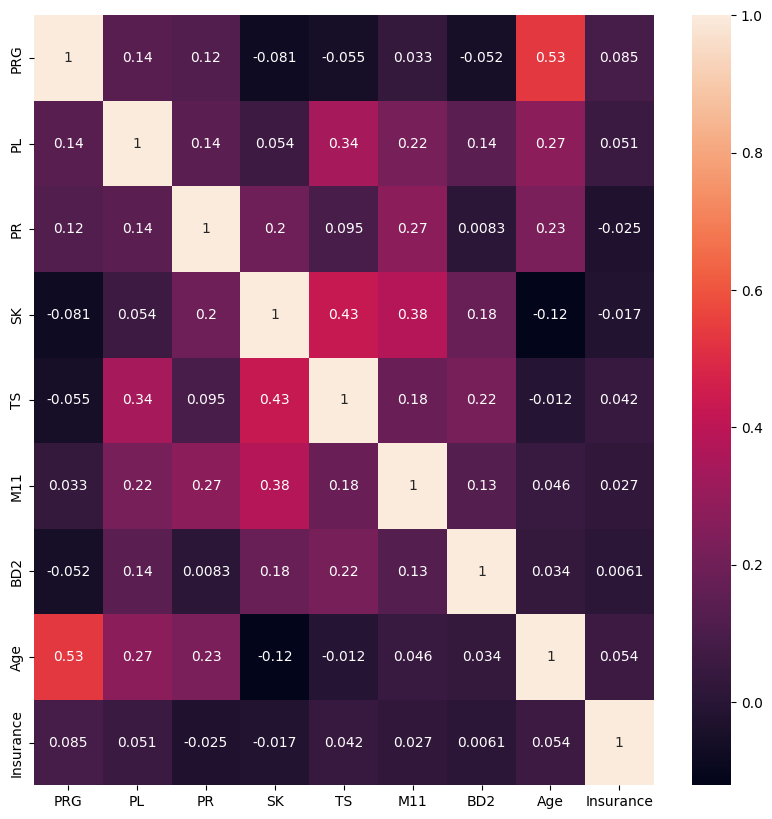

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=pfiles_df_noid.drop(['Sepssis'], axis=1).corr(), annot=True)

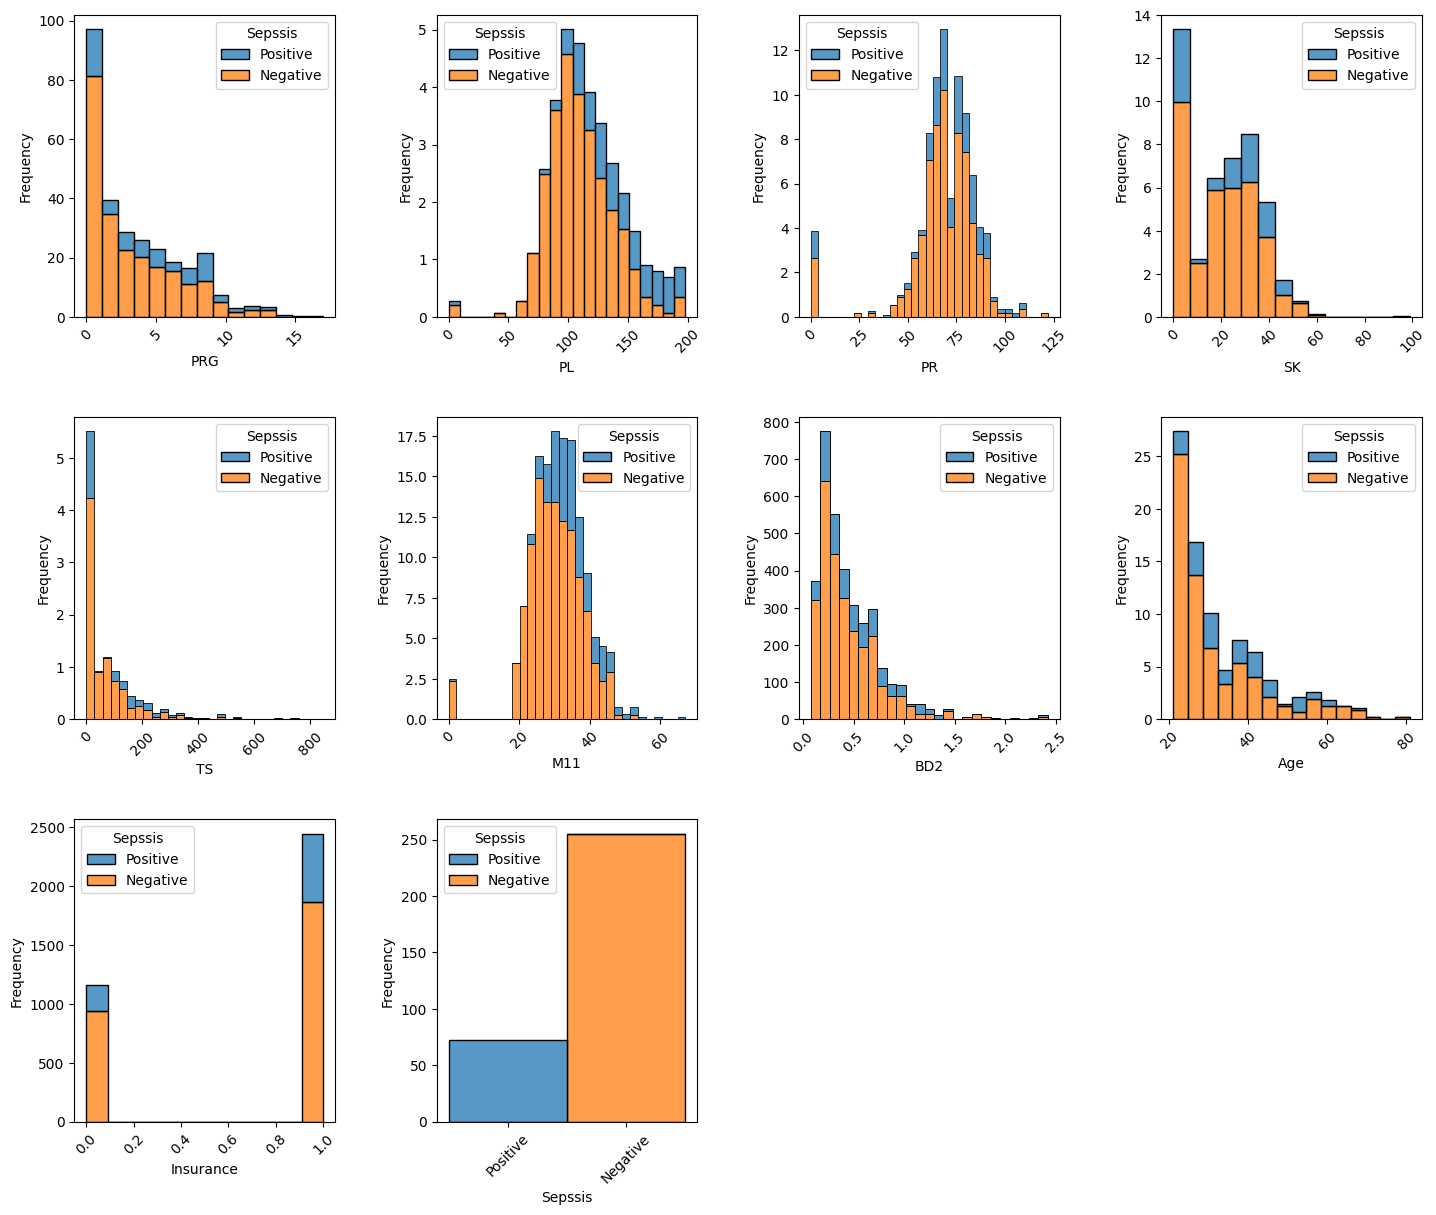

In [20]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', hue='Sepssis', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

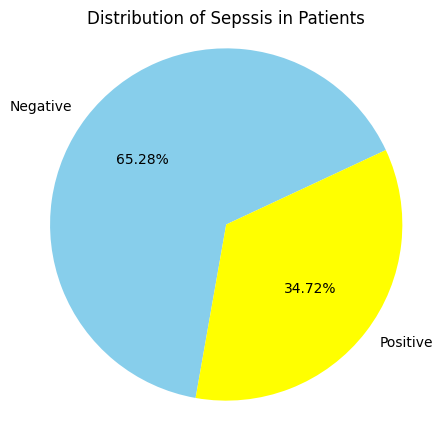

In [21]:
#pfiles_df['Sepssis']=pfiles_df['Churn'].fillna('No')
#df_churn_mod['Churn'].unique()

sepssis_counts = pfiles_df['Sepssis'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

#### Dataset Splitting

In [22]:
X = pfiles_df_noid.drop(columns=['Sepssis']) 

y = pfiles_df_noid['Sepssis'] 

In [23]:
X.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [24]:
y.isnull().sum()

np.int64(0)

In [25]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [26]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 9)
X_eval shape: (150, 9)
y_train shape: (449,)
y_eval shape: (150,)


#### Label Encoding

In [27]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)

In [28]:
numerical_cols=X_train.select_dtypes(include='number').columns

#numerical pipeline
num_pipeline=Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', RobustScaler()),
    
])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols)
])

In [29]:
models={}
models['Logistic_Regression']= LogisticRegression(random_state=5)
models['Support_Vector_Machine']= LinearSVC(random_state=5)
models['Decision_Tree']= DecisionTreeClassifier(random_state=5)
models['Random_Forest']= RandomForestClassifier(random_state=5)
models['Naive_Bayes']= GaussianNB()
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=5)
models['XGBoost']= XGBClassifier(random_state=5)

In [30]:
# Creating Pipeline

all_pipelines_unbalanced = {}
metric_table_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    unbalanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_unbalanced[model_name] = unbalanced_pipeline
    
    y_pred=unbalanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_unbalanced.loc[len(metric_table_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_unbalanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
0,Logistic_Regression,0.760000,0.753563,0.760000,0.753059
1,Support_Vector_Machine,0.760000,0.753563,0.760000,0.753059
6,Gradient_Boosting,0.746667,0.744533,0.746667,0.745462
4,Naive_Bayes,0.726667,0.723268,0.726667,0.724668
3,Random_Forest,0.726667,0.718360,0.726667,0.719719
5,K-Nearest_Neighbors,0.706667,0.701830,0.706667,0.703733
7,XGBoost,0.693333,0.685942,0.693333,0.688500
2,Decision_Tree,0.640000,0.650255,0.640000,0.644134


In [31]:
# Creating Pipeline

all_pipelines_balanced= {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
0,Logistic_Regression,0.726667,0.752795,0.726667,0.732568
1,Support_Vector_Machine,0.726667,0.752795,0.726667,0.732568
4,Naive_Bayes,0.726667,0.752795,0.726667,0.732568
6,Gradient_Boosting,0.686667,0.713658,0.686667,0.693431
2,Decision_Tree,0.680000,0.719031,0.680000,0.687625
7,XGBoost,0.680000,0.682978,0.680000,0.681369
3,Random_Forest,0.666667,0.680000,0.666667,0.671479
5,K-Nearest_Neighbors,0.653333,0.714667,0.653333,0.661212


#### Hyperparameters tuning

Tuning unbalanced data


In [32]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
    
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {'logistic_regression__C': [10, 100, 200, 300]},
    'Support_Vector_Machine': {'support_vector_machine__C': [1]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 5, 10]},    'Random_Forest': {'random_forest__n_estimators': [200, 300, 400], 'random_forest__max_depth': [10, 20, 30]},
    'Category_Boosting': {'category_boosting__learning_rate': [0.1, 1, 10], 'category_boosting__depth': [5], 'category_boosting__iterations': [100, 200, 300]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100], 'gradient_boosting__max_depth': [2, 3], 'gradient_boosting__learning_rate': [0.1, 1, 10]},
    'XGBoost': {'xgboost__n_estimators': [30, 40, 50], 'xgboost__max_depth': [2, 3]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Category_Boosting', 'Gradient_Boosting', 'XGBoost']:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 10}
Best score: 0.7639450686641698
Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 1}
Best score: 0.766167290886392
Tuning Decision_Tree...
Best parameters: {'decision_tree__max_depth': 2}
Best score: 0.8016229712858927
Tuning Random_Forest...
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7616479400749064
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7616479400749064
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7616479400749064
Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 2, 'gradient_boosting__n_estimators': 100}
Best score: 0.7638951310861423
Tuning XGBoost...
Best parameters: {'xgboost__max_depth': 2, 'xgboost__n_estimators': 50}
Best score: 0.77

Tuning on balanced data

In [33]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {'logistic_regression__C': [10, 100, 200, 300]},
    'Support_Vector_Machine': {'support_vector_machine__C': [1]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 5, 10]},
    'Random_Forest': {'random_forest__n_estimators': [200, 300, 400], 'random_forest__max_depth': [10, 20, 30]},
    'Category_Boosting': {'category_boosting__learning_rate': [0.1, 1, 10], 'category_boosting__depth': [5], 'category_boosting__iterations': [100, 200, 300]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100], 'gradient_boosting__max_depth': [2, 3], 'gradient_boosting__learning_rate': [0.1, 1, 10]},
    'XGBoost': {'xgboost__n_estimators': [30, 40, 50], 'xgboost__max_depth': [2, 3]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Category_Boosting', 'Gradient_Boosting', 'XGBoost']:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 10}
Best score: 0.737103620474407
Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 1}
Best score: 0.7282147315855181
Tuning Decision_Tree...
Best parameters: {'decision_tree__max_depth': 2}
Best score: 0.774956304619226
Tuning Random_Forest...
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7528339575530587
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7528339575530587
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.7528339575530587
Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 2, 'gradient_boosting__n_estimators': 100}
Best score: 0.7438951310861424
Tuning XGBoost...
Best parameters: {'xgboost__max_depth': 2, 'xgboost__n_estimators': 30}
Best score: 0.750